<a href="https://colab.research.google.com/github/dkarakost/MBE_project/blob/main/Theoneapproach.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !pip install d2l==1.0.3
# !pip install opencv-python
# !pip install scikit-learn

In [1]:
import torch

if torch.__version__ != '2.5.1+cu124':
    !pip install torch==2.5.1+cu124 torchvision==0.20.1+cu124 torchaudio==2.5.1 --index-url https://download.pytorch.org/whl/cu124 -U --quiet
    print("PyTorch version updated to 2.5.1.")
else:
    print("PyTorch is already at the correct version (2.5.1).")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 MB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 109.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 74.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 93.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 55.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 106.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
!pip install d2l==1.0.3 --quiet
!pip install scipy --quiet
!pip install torchmetrics --quie

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.7/111.7 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 80.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 21.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 98.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.1/34.1 MB 23.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.0/125.0 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.0/95.0 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 75.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the sou

In [2]:
%matplotlib inline
from d2l import torch as d2l
import torch
import torchvision
from torchvision.transforms import ToPILImage
from torch import nn
from torch.nn import functional as F
from PIL import ImageFile, Image
# ImageFile.LOAD_TRUNCATED_IMAGES = True
import matplotlib.pyplot as plt
from object_detection_utils import ResizeWithBBox, plot_bbox, plot_grid, box_xyxy_to_cxcywh, box_xywh_to_xyxy
import random
import cv2

# Download the dataset
First, let's download the dataset. It consists of images of plant, bounding box annotations, and leaf counts annotations.

In [3]:
!git clone https://git.wur.nl/abe-datasets/education/fruit-detection-challenge.git

Cloning into 'fruit-detection-challenge'...
remote: Enumerating objects: 2010, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 2010 (delta 2), reused 0 (delta 0), pack-reused 2004 (from 1)
Receiving objects: 100% (2010/2010), 255.89 MiB | 17.05 MiB/s, done.
Resolving deltas: 100% (21/21), done.
Updating files: 100% (1958/1958), done.


Let's have a look at one image.

In [4]:
# image = Image.open('leaf-dataset/detection/ara2012_plant001_rgb.png')
# plt.imshow(image)

In [5]:
# image.size

# The `Dataset` class
Now, let's create a dataset customized to our data.
We will call it `LeafDetectionDataset`.
* The constructor of the dataset (`__init__`) takes the root folder of the data, and finds the (sorted) path of all the images and bounding box annotations.
Lastly, it also has a `classes` variable. In our case, we only have one class: leaf.
* The `__get_item__` function gets the next image at index `idx` as well as the ground-truth bounding boxes.

In [47]:
import json
import os
import torch
from PIL import Image
import numpy as np
import cv2

class FruitDetectionDataset(torch.utils.data.Dataset):
    def __init__(self, json_path, img_folder, img_size, transforms=None):
        """
        Constructor of the FruitDetectionDataset
        :param json_path: Path to the COCO JSON file
        :param img_folder: Folder containing the images
        :param img_size: Size to resize the images
        :param transforms: List of transformations to be applied to the data
        """
        self.img_folder = img_folder
        self.transforms = transforms
        self.resize = ResizeWithBBox(img_size)

        # Load the COCO JSON file
        with open(json_path, 'r') as f:
            coco_data = json.load(f)

        # Extract image info and annotations
        self.images = coco_data['images']
        self.annotations = coco_data['annotations']
        self.categories = coco_data['categories']

        # Create a mapping from category ID to category index
        self.category_id_to_index = {category['id']: idx for idx, category in enumerate(self.categories)}

        # Create a mapping from image ID to annotations
        self.img_id_to_annotations = {}
        for annotation in self.annotations:
            img_id = annotation['image_id']
            if img_id not in self.img_id_to_annotations:
                self.img_id_to_annotations[img_id] = []
            self.img_id_to_annotations[img_id].append(annotation)

        # Create a list of image paths
        self.img_files = [os.path.join(img_folder, img['file_name']) for img in self.images]

    def __getitem__(self, idx):
        # Get image path and annotations
        img_path = self.img_files[idx]
        img_id = self.images[idx]['id']
        annotations = self.img_id_to_annotations.get(img_id, [])

        # Load image
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = Image.fromarray(img)

        # Extract bounding boxes and labels
        bboxes = []
        labels = []
        for annotation in annotations:
            x, y, width, height = annotation['bbox']
            bboxes.append([x, y, width, height])
            category_id = annotation['category_id']
            labels.append(self.category_id_to_index[category_id])

        bboxes = torch.tensor(bboxes, dtype=torch.float32)
        labels = torch.tensor(labels, dtype=torch.int64)

        if len(bboxes.shape) == 1:
            bboxes = bboxes.unsqueeze(0)

        # Resize image and boxes
        img, bboxes = self.resize(image=img, boxes=bboxes)
        bboxes = box_xyxy_to_cxcywh(box_xywh_to_xyxy(torch.tensor(bboxes, dtype=torch.float32)))

        # Apply transforms
        if self.transforms:
            img = self.transforms(img)

        # Add illegal boxes if needed
        illegal_needed = 50 - len(bboxes)
        illegal_labels = torch.ones((illegal_needed,), dtype=torch.int64) * -1
        illegal_boxes = torch.zeros((illegal_needed, 4), dtype=torch.float32) * -1

        return img, {
            "labels": torch.cat((labels, illegal_labels)),
            "boxes": torch.cat((bboxes, illegal_boxes), axis=0),
        }

    def __len__(self):
        return len(self.img_files)


Now that we created our custom `Dataset` class, let's create a train a validation dataset

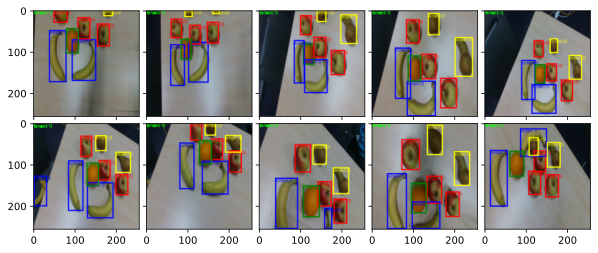

In [48]:


img_size = 256
batch_size = 16

augs = torchvision.transforms.Compose([torchvision.transforms.ToTensor()])

Trainjson_path="fruit-detection-challenge/detection/annotations/train.json"
Valjson_path="fruit-detection-challenge/detection/annotations/val.json"
train_folder="fruit-detection-challenge/detection/train/"
val_folder="fruit-detection-challenge/detection/val/"

image_size=256
batch_size=4
#transform
#####augs = torchvision.transforms.Compose([torchvision.transforms.ToTensor()])
#trainig set
training_set=FruitDetectionDataset(Trainjson_path,train_folder,img_size=(image_size, image_size),transforms=augs)
#Training set loader
train_loader = torch.utils.data.DataLoader(training_set, batch_size=batch_size, shuffle=True, num_workers=2)
#validation set
val_set=FruitDetectionDataset(Valjson_path,val_folder,img_size=(image_size, image_size),transforms=augs)
val_loader=torch.utils.data.DataLoader(val_set, batch_size=batch_size, shuffle=True, num_workers=2)

display_imgs_bbox = []
for i in range(10):
    img, target = training_set[i]
    img = ToPILImage()(img)
    img = plot_bbox(img, target["boxes"] * img_size, target["labels"])
    display_imgs_bbox.append(img)

# Plot two grids, one per list (don't forget the functions declared in the beginning of this notebook)
plot_grid(imgs=display_imgs_bbox, nrows=2, ncols=5)


Create Test set

In [54]:
from torch.utils.data import Dataset
from PIL import Image
import os

class TestImageDataset(Dataset):
    def __init__(self, img_dir, transform=None):
        self.img_dir = img_dir
        self.img_files = sorted([os.path.join(img_dir, f)
                                 for f in os.listdir(img_dir) if f.lower().endswith(('jpg', 'jpeg', 'png'))])
        self.transform = transform
        self.images = [{"id": i} for i in range(len(self.img_files))]  # dummy ids

    def __len__(self):
        return len(self.img_files)

    def __getitem__(self, idx):
        img_path = self.img_files[idx]
        image = Image.open(img_path).convert("RGB")
        if self.transform:
            image = self.transform(image)
        return image, 0  # dummy label
#test set

img_size=256
test_transform = torchvision.transforms.Compose([
    torchvision.transforms.Resize((img_size, img_size)),
    torchvision.transforms.ToTensor(),
])

test_dataset = TestImageDataset("/content/fruit-detection-challenge/test", transform=test_transform)

## Recomendations
This is a small dataset with roughly 100 images. The images present a low resolution and a big number of small objects. It's going to be a challenge for our simple Object Detection model. Don't be surprised if the average precision that you get oscilates between 0.2 and 0.3.

Things to try for better performance:
- Increase the resolution of the images. This also helps in the amount of objects that our detector can predict.
- Use data augmentations.
- Try different backbones/encoders.
- Freeze the backbone/encoder so its weights are not trained. This is useful when dealing with small datasets. You can use the following code for it:
    ```python
    backbone = models.resnet50(pretrained=pretrained)
    for param in backbone.parameters():
        param.requires_grad = False
    ```
- We have a lot of overlapping objects. Therefore, be aware of the Non-Maximum suppression threshold that you use for both calculating the AP and making predictions.
    - You can change the NMS threshold while calculating the AP during training like this: `ap = ap_calculator.calculate_map(model, nms_threshold=0.5)`
    - And for predictions like this: `boxes, top_class, scores = predict(model, img, n_classes=1, nms_threshold=0.3)`
    

In [90]:
import torch
import torch.nn as nn
import torchvision.models as models

class PredictionHead(nn.Module):
    def __init__(self, in_channels, num_classes):
        super(PredictionHead, self).__init__()

        self.conv_layers = nn.Sequential(
            nn.Conv2d(in_channels, in_channels // 2, kernel_size=3, stride=2, padding=1),
            nn.BatchNorm2d(in_channels // 2),
            nn.LeakyReLU(negative_slope=0.1),
            nn.Dropout2d(0.1),
            nn.Conv2d(in_channels // 2, in_channels // 4, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(in_channels // 4),
            nn.LeakyReLU(negative_slope=0.1),
            nn.Dropout2d(0.1),
            nn.Conv2d(in_channels // 4, in_channels // 4, kernel_size=1),
            nn.BatchNorm2d(in_channels // 4),
            nn.LeakyReLU(negative_slope=0.1),
        )

        self.box_predictor = nn.Sequential(
            nn.Conv2d(in_channels=in_channels // 4, out_channels=in_channels // 4, kernel_size=(3, 3), stride=(1, 1), padding=1),
            nn.BatchNorm2d(in_channels // 4),
            nn.LeakyReLU(negative_slope=0.1),
            nn.Conv2d(in_channels=in_channels // 4, out_channels=4, kernel_size=(3, 3), stride=(1, 1), padding=1),
            nn.Sigmoid(),
        )

        # Classifier
        self.classifier = nn.Sequential(
            nn.Conv2d(in_channels=in_channels // 4, out_channels=in_channels // 4, kernel_size=(3, 3), stride=(1, 1), padding=1),
            nn.BatchNorm2d(in_channels // 4),
            nn.LeakyReLU(negative_slope=0.1),
            nn.Conv2d(in_channels=in_channels // 4, out_channels=num_classes, kernel_size=(3, 3), stride=(1, 1), padding=1),
        )

        # Objectness score predictor
        self.objectness_predictor = nn.Sequential(
            nn.Conv2d(in_channels=in_channels // 4, out_channels=in_channels // 4, kernel_size=(3, 3), stride=(1, 1), padding=1),
            nn.BatchNorm2d(in_channels // 4),
            nn.LeakyReLU(negative_slope=0.1),
            nn.Conv2d(in_channels=in_channels // 4, out_channels=1, kernel_size=(3, 3), stride=(1, 1), padding=1),
            nn.Sigmoid(),
        )

    def forward(self, x):
        x = self.conv_layers(x)

        cls_logits = self.classifier(x)
        bbox_pred = self.box_predictor(x)
        objectness_pred = self.objectness_predictor(x)

        # Add relative grid position to the cx and cy predictions of each box
        grid_size = x.shape[-1]
        grid_y, grid_x = torch.meshgrid(
            torch.arange(grid_size, device=x.device), torch.arange(grid_size, device=x.device), indexing="ij"
        )
        cx = bbox_pred[:, 0, :, :]
        cy = bbox_pred[:, 1, :, :]
        w = bbox_pred[:, 2, :, :]
        h = bbox_pred[:, 3, :, :]
        cx = (cx + (grid_x)) / grid_size
        cy = (cy + (grid_y)) / grid_size
        bbox_pred = torch.stack([cx, cy, w, h], dim=1)

        return cls_logits, bbox_pred, objectness_pred

class ObjectDetectorMultiScale(nn.Module):
    def __init__(self, n_classes, pretrained=True):
        super(ObjectDetectorMultiScale, self).__init__()

        # We add the background class
        self.n_classes = n_classes

        # Backbone
        backbone = models.resnet50(pretrained=pretrained)
        for param in backbone.parameters():
             param.requires_grad = False
        self.backbone = nn.Sequential(*list(backbone.children())[:-3])

        # Layer 1
        self.block_1 = nn.Sequential(*list(backbone.children())[-3])

        self.prediction_head = PredictionHead(2048, self.n_classes)
        self.prediction_head_2 = PredictionHead(1024, self.n_classes)

    def forward(self, x):
        features = self.backbone(x)
        y_ = self.block_1(features)

        cls_logits, bbox_pred, objectness_pred = self.prediction_head(y_)
        cls_preds = cls_logits.flatten(2, 3).permute(0, 2, 1)
        box_preds = bbox_pred.flatten(2, 3).permute(0, 2, 1)
        obj_preds = objectness_pred.flatten(2, 3).permute(0, 2, 1)

        cls_logits2, bbox_pred2, objectness_pred2 = self.prediction_head_2(features)
        cls_preds2 = cls_logits2.flatten(2, 3).permute(0, 2, 1)
        box_preds2 = bbox_pred2.flatten(2, 3).permute(0, 2, 1)
        obj_preds2 = objectness_pred2.flatten(2, 3).permute(0, 2, 1)

        # Concatenate predictions from all heads
        pred_logits = torch.cat([cls_preds, cls_preds2], dim=1)
        pred_boxes = torch.cat([box_preds, box_preds2], dim=1)
        pred_objectness = torch.cat([obj_preds, obj_preds2], dim=1)

        return {"pred_logits": pred_logits, "pred_boxes": pred_boxes, "pred_objectness": pred_objectness}

154.7 examples/sec on cuda:0


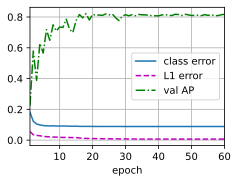

In [91]:
import torch
import torch.nn.functional as F
import torchvision.models as models
from object_detection_utils import *

def train_model(model, train_loader, val_loader, num_epochs=50, lr=1e-3, weight_decay=1e-4, step_size=20, gamma=0.1):
    device = d2l.try_gpu()
    model = model.to(device)
    matcher = HungarianMatcher()
    optimizer = torch.optim.AdamW(model.parameters(), lr=lr, weight_decay=weight_decay)
    scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=step_size, gamma=gamma)
    print("total num of parameters in the model:", sum(p.numel() for p in model.parameters()))

    timer = d2l.Timer()
    animator = d2l.Animator(xlabel="epoch", xlim=[1, num_epochs], legend=["class error", "L1 error", "val AP"])

    ap_calculator = APCalculator(val_loader)

    for epoch in range(num_epochs):
        metric = d2l.Accumulator(4)
        model.train()
        for img, targets in train_loader:
            timer.start()

            img = img.to(device)

            # Remove illegal targets
            new_targets = []
            for i in range(targets["labels"].shape[0]):
                labels = targets["labels"][i]
                boxes = targets["boxes"][i]
                new_targets.append({"labels": labels[labels != -1].to(device), "boxes": boxes[labels != -1].to(device)})

            outputs = model(img)

            num_boxes = sum(len(t["labels"]) for t in new_targets)
            num_boxes = torch.as_tensor([num_boxes], dtype=torch.float, device=next(iter(outputs.values())).device)

            src_logits = outputs["pred_logits"]
            src_boxes = outputs["pred_boxes"]
            src_objectness = outputs["pred_objectness"]

            indices = matcher(outputs, new_targets)  # Run matcher
            idx = get_src_permutation_idx(indices)

            # Loss class
            target_classes_o = torch.cat([t["labels"][J] for t, (_, J) in zip(new_targets, indices)])
            target_classes = torch.full(src_logits.shape[:2], -100, dtype=torch.int64, device=device)
            target_classes[idx] = target_classes_o
            loss_ce = F.cross_entropy(src_logits.transpose(1, 2), target_classes, ignore_index=-100,label_smoothing=0.1)

            # Loss boxes L1 and GIOU
            src_boxes = src_boxes[idx]
            target_boxes = torch.cat([t["boxes"][i] for t, (_, i) in zip(new_targets, indices)], dim=0)

            loss_bbox = F.l1_loss(src_boxes, target_boxes, reduction="none")
            loss_bbox = loss_bbox.sum() / num_boxes

            # Loss objectness
            target_objectness = torch.zeros_like(src_objectness, device=device)
            target_objectness[idx] = 1
            loss_objectness = F.mse_loss(src_objectness, target_objectness, reduction="mean")

            # Sum the losses
            loss = loss_ce + loss_bbox + loss_objectness

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            metric.add(
                loss_ce.cpu().detach().numpy(),
                loss_bbox.cpu().detach().numpy(),
                loss_objectness.cpu().detach().numpy(),
                img.size()[0],
            )
        scheduler.step()
        cls_err, L1_error, obj_error = metric[0] / metric[3], metric[1] / metric[3], metric[2] / metric[3]
        ap = ap_calculator.calculate_map(model, nms_threshold=0.5)
        print(ap)
        animator.add(epoch + 1, (cls_err, L1_error, ap["map_50"]))
    print(f"{len(train_loader.dataset) / timer.stop():.1f} examples/sec on " f"{str(device)}")

# Example usage:
# train_model(model, train_loader, val_loader)
model = ObjectDetectorMultiScale(n_classes=len(training_set.categories))
train_model(model, train_loader, val_loader, num_epochs=60, lr=1e-3, weight_decay=0.05, step_size=15, gamma=0.1)

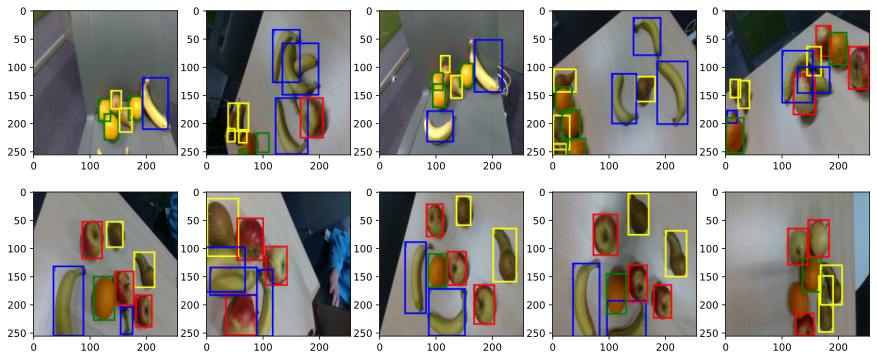

In [100]:
# Visualize some predictions
nrows, ncols = 2, 5
plt.figure(figsize=(15, 6))
for i in range(nrows * ncols):
    # Get a random image
    img, _ = training_set[random.randint(0, len(training_set) - 1)]
    # Get the predicted bboxes
    boxes, scores, top_class = predict(model, img, n_classes=4, nms_threshold=0.5, conf_threshold=0.5)
    # Plot it
    plot_img = plot_bbox(ToPILImage()(img), boxes, top_class.numpy())
    plt.subplot(nrows, ncols, i + 1)
    plt.imshow(plot_img)
plt.show()

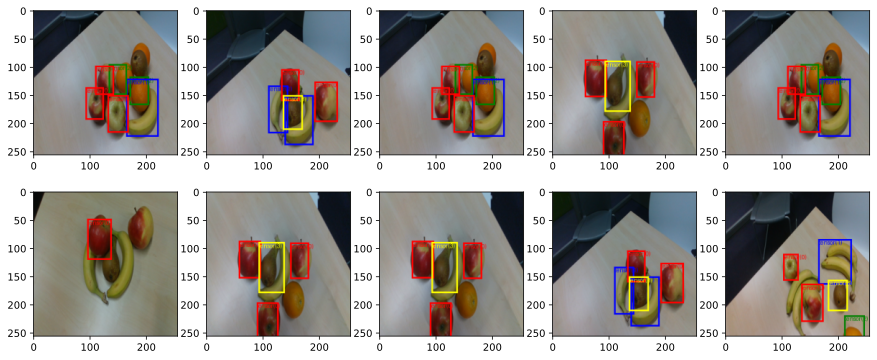

In [101]:
# Visualize some predictions
nrows, ncols = 2, 5
plt.figure(figsize=(15, 6))
for i in range(nrows * ncols):
    # Get a random image
    img, _ = val_set[random.randint(0, len(val_set) - 1)]
    # Get the predicted bboxes
    boxes, scores, top_class = predict(model, img, n_classes=4, nms_threshold=0.5, conf_threshold=0.5)
    # Plot it
    plot_img = plot_bbox(ToPILImage()(img), boxes, top_class)
    plt.subplot(nrows, ncols, i + 1)
    plt.imshow(plot_img)
plt.show()

/content/fruit-detection-challenge/test/color_001.png
/content/fruit-detection-challenge/test/color_002.png
/content/fruit-detection-challenge/test/color_003.png
/content/fruit-detection-challenge/test/color_004.png
/content/fruit-detection-challenge/test/color_005.png
/content/fruit-detection-challenge/test/color_006.png
/content/fruit-detection-challenge/test/color_007.png
/content/fruit-detection-challenge/test/color_008.png
/content/fruit-detection-challenge/test/color_009.png
/content/fruit-detection-challenge/test/color_010.png


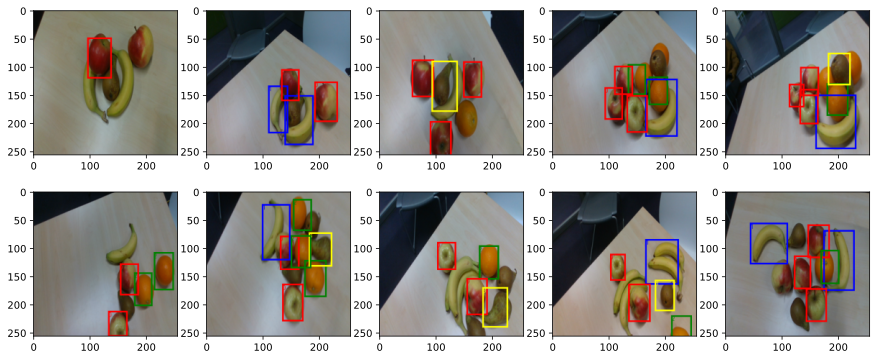

In [102]:
# Visualize some predictions
nrows, ncols = 2, 5
plt.figure(figsize=(15, 6))
for i in range(nrows * ncols):
    # Get a random image
    img, _ = val_set[i]
    print(test_dataset.img_files[i])
    # Get the predicted bboxes
    boxes, scores, top_class = predict(model, img, n_classes=4, nms_threshold=0.3, conf_threshold=0.5)
    # Plot it
    plot_img = plot_bbox(ToPILImage()(img), boxes, top_class.numpy())
    plt.subplot(nrows, ncols, i + 1)
    plt.imshow(plot_img)
plt.show()

In [103]:
ap_calculator = APCalculator(train_loader)
ap = ap_calculator.calculate_map(model, nms_threshold=0.5)

print(f"AP: {ap['map'].item():.4f}")
print(f"AP@50: {ap['map_50'].item():.4f}")
print(f"AP@75: {ap['map_75'].item():.4f}")
print(f"AP (small): {ap['map_small'].item():.4f}")
print(f"AP (medium): {ap['map_medium'].item():.4f}")
print(f"AP (large): {ap['map_large'].item():.4f}")
print(f"AR@1: {ap['mar_1'].item():.4f}")
print(f"AR@10: {ap['mar_10'].item():.4f}")
print(f"AR@100: {ap['mar_100'].item():.4f}")
print(f"AR (small): {ap['mar_small'].item():.4f}")
print(f"AR (medium): {ap['mar_medium'].item():.4f}")
print(f"AR (large): {ap['mar_large'].item():.4f}")
print(f"AP per class: {ap['map_per_class']}")
print(f"AR@100 per class: {ap['mar_100_per_class']}")
print(f"Classes: {ap['classes']}")

AP: 0.6831
AP@50: 0.9237
AP@75: 0.7491
AP (small): 0.6831
AP (medium): -1.0000
AP (large): -1.0000
AR@1: 0.3805
AR@10: 0.7560
AR@100: 0.7560
AR (small): 0.7560
AR (medium): -1.0000
AR (large): -1.0000
AP per class: tensor([0.7827, 0.6114, 0.7544, 0.5839])
AR@100 per class: tensor([0.8333, 0.6910, 0.8091, 0.6904])
Classes: tensor([0, 1, 2, 3], dtype=torch.int32)


In [104]:
ap_calculator = APCalculator(val_loader)
ap = ap_calculator.calculate_map(model, nms_threshold=0.5)

print(f"AP: {ap['map'].item():.4f}")
print(f"AP@50: {ap['map_50'].item():.4f}")
print(f"AP@75: {ap['map_75'].item():.4f}")
print(f"AP (small): {ap['map_small'].item():.4f}")
print(f"AP (medium): {ap['map_medium'].item():.4f}")
print(f"AP (large): {ap['map_large'].item():.4f}")
print(f"AR@1: {ap['mar_1'].item():.4f}")
print(f"AR@10: {ap['mar_10'].item():.4f}")
print(f"AR@100: {ap['mar_100'].item():.4f}")
print(f"AR (small): {ap['mar_small'].item():.4f}")
print(f"AR (medium): {ap['mar_medium'].item():.4f}")
print(f"AR (large): {ap['mar_large'].item():.4f}")
print(f"AP per class: {ap['map_per_class']}")
print(f"AR@100 per class: {ap['mar_100_per_class']}")
print(f"Classes: {ap['classes']}")

AP: 0.3384
AP@50: 0.8176
AP@75: 0.2560
AP (small): 0.3384
AP (medium): -1.0000
AP (large): -1.0000
AR@1: 0.2160
AR@10: 0.4212
AR@100: 0.4227
AR (small): 0.4227
AR (medium): -1.0000
AR (large): -1.0000
AP per class: tensor([0.5127, 0.2901, 0.3323, 0.2184])
AR@100 per class: tensor([0.5880, 0.3294, 0.4333, 0.3400])
Classes: tensor([0, 1, 2, 3], dtype=torch.int32)


In [105]:
# You can place this in a new file or in your notebook after training
import torch
import torchvision
import os
from PIL import Image
from object_detection_utils import box_xywh_to_xyxy, box_cxcywh_to_xyxy


def predict_test_set(model, test_dataset, output_txt_path, score_threshold=0.3, nms_threshold=0.3):
    """
    Predict bounding boxes for all images in the test dataset and save to a text file:
      file_name, cx, cy, w, h, label, score
    """
    model.eval()
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    with open(output_txt_path, "w") as out_file:
        for i in range(len(test_dataset)):
            # Load data
            img_path = test_dataset.img_files[i]
            img_id = test_dataset.images[i]["id"]
            # Just to get the original PIL image without transforms
            pil_img = Image.open(img_path).convert("RGB")
            tensor_img = torchvision.transforms.ToTensor()(pil_img).to(device)

            boxes, scores, top_class = predict(model, torchvision.transforms.functional.resize(tensor_img, (img_size, img_size)), n_classes=4, nms_threshold=nms_threshold, conf_threshold=score_threshold)

            # Write results
            file_name = os.path.basename(img_path)
            for box, lbl, sc in zip(boxes, top_class, scores):
                box = box / img_size
                cx, cy, w, h = box.tolist()
                out_file.write(f"{file_name}, {cx}, {cy}, {w}, {h}, {lbl.item()+1}, {sc.item()}\n")

    print(f"Predictions saved to {output_txt_path}")

predict_test_set(model, test_dataset, "predictions_one_stage.txt", score_threshold=0.1, nms_threshold=0.5)

Predictions saved to predictions_one_stage.txt


In [106]:
from object_detection_utils import FileBasedAPCalculator

ap_calculator = FileBasedAPCalculator(
                        "fruit-detection-challenge/detection/annotations/val.txt",
                        "predictions_one_stage.txt",
                    )
ap_calculator.calculate_map()

{'map': tensor(0.0003),
 'map_50': tensor(0.0015),
 'map_75': tensor(0.),
 'map_small': tensor(0.0003),
 'map_medium': tensor(-1.),
 'map_large': tensor(-1.),
 'mar_1': tensor(0.),
 'mar_10': tensor(0.0020),
 'mar_100': tensor(0.0020),
 'mar_small': tensor(0.0020),
 'mar_medium': tensor(-1.),
 'mar_large': tensor(-1.),
 'map_per_class': tensor([0.0012, 0.0000, 0.0000, 0.0000]),
 'mar_100_per_class': tensor([0.0080, 0.0000, 0.0000, 0.0000]),
 'classes': tensor([1, 2, 3, 4], dtype=torch.int32)}

In [107]:
# Visualize some predictions

# Get a random image
img, _ = val_set[9]
# Get the predicted bboxes
boxes, scores, top_class = predict(model, img, n_classes=4, nms_threshold=0.5, conf_threshold=0.5)

ToPILImage()(img).save("input.jpg")
plot_img = plot_bbox(ToPILImage()(img), boxes, top_class.numpy())
plot_img.show()
plot_img.save("output_one_stage.jpg")
